In [78]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 

import warnings
warnings.filterwarnings('ignore')

In [79]:
#importing data from github and converting into a DataFrame
data=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset3/main/Salaries.csv')
data.head()


,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500


In [80]:
#finding number of rows and columns
data.shape

(397, 6)

In [81]:
#understanding the data at high level i.e. checking the statistics of the data
data.describe()


,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [82]:
#finding the null values in each column
data.isna().sum()

rank             0
discipline       0
yrs.since.phd    0
yrs.service      0
sex              0
salary           0
dtype: int64

In [83]:
data.describe()

,yrs.since.phd,yrs.service,salary
count,397.000000,397.000000,397.000000
mean,22.314861,17.614610,113706.458438
std,12.887003,13.006024,30289.038695
min,1.000000,0.000000,57800.000000
25%,12.000000,7.000000,91000.000000
50%,21.000000,16.000000,107300.000000
75%,32.000000,27.000000,134185.000000
max,56.000000,60.000000,231545.000000


In [84]:
#droping columns having string values as we can not plot them
data=data.drop(columns=['rank','discipline', 'sex'])
data.head()

,yrs.since.phd,yrs.service,salary
0,19,18,139750
1,20,16,173200
2,4,3,79750
3,45,39,115000
4,40,41,141500


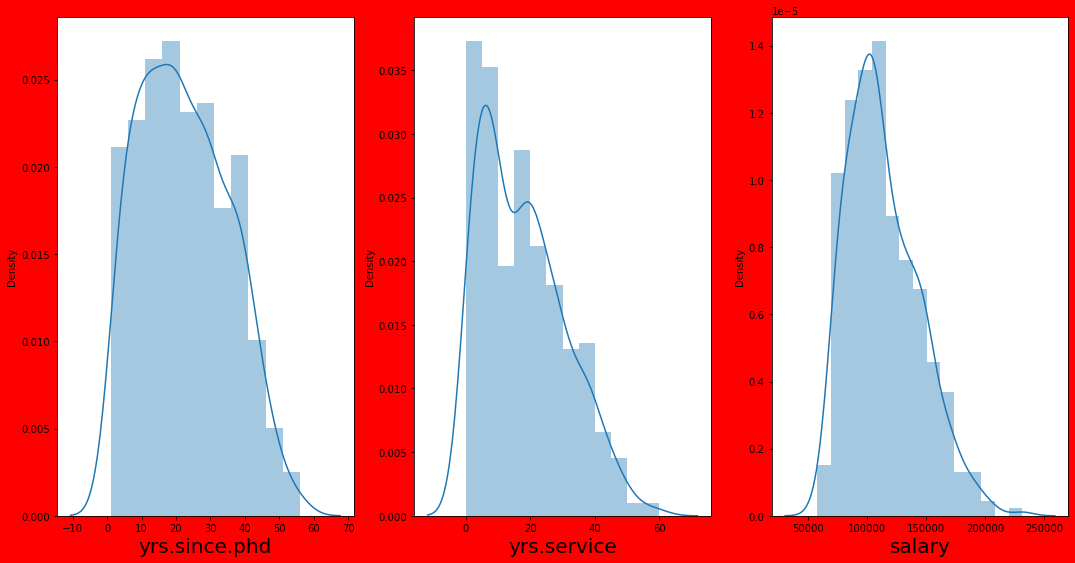

In [86]:

    
#now the data looks good and there is no missing valuues so we can start visualizing the type of distribution for each feature

plt.figure(figsize=(20,15), facecolor='red')
plotnumber=1

for column in data:
    if plotnumber<=3:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column, fontsize=20)
        
    plotnumber+=1
plt.tight_layout()


In [87]:
# the data distribution seems to be good enough and we do not observe any skewness so now lets move on to find the 
# relation between the features and labels

y=data['salary']
x=data.drop(columns=['salary'])





In [88]:
x

,yrs.since.phd,yrs.service
0,19,18
1,20,16
2,4,3
3,45,39
4,40,41
...,...,...
392,33,30
393,31,19
394,42,25
395,25,15


In [89]:
y

0      139750
1      173200
2       79750
3      115000
4      141500
        ...  
392    103106
393    150564
394    101738
395     95329
396     81035
Name: salary, Length: 397, dtype: int64

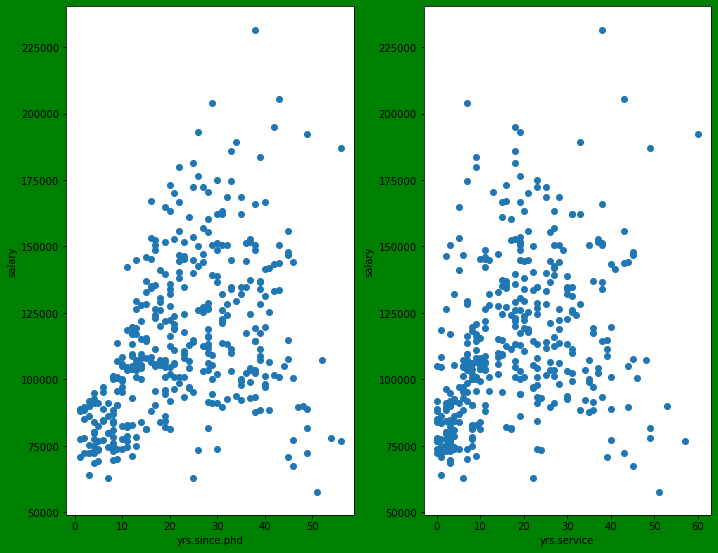

In [90]:
#visualizing relationship between labels and features
plt.figure(figsize=(20,15), facecolor='green')
plotnumber=1

for column in x:
    if plotnumber<=3:
        ax=plt.subplot(2,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column, fontsize=10)
        plt.ylabel('salary',fontsize=10)
        
    plotnumber+=1
plt.tight_layout()

In [ ]:
# the relationship  between the labels and feature looks fairly linear, so the linearity assumption is satisfied
#as both the features are in same unit so we are not going to scale the data

# As the dependent variable/ label (salary) is a continious data so it is a regression problem and as the features are also
# continious data so we will use linear Regression Model



In [92]:
#splitting the data between train and test. the model will be built(trained) on the train data and tested on test data

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=49)
y_train.head()

211    111350
93     166024
252    132000
293    104800
326    124714
Name: salary, dtype: int64

In [94]:
#model instantiating and training
regression=LinearRegression()
regression.fit(x_train, y_train)


LinearRegression()

In [99]:
#prediction of salary
data.tail(2)

,yrs.since.phd,yrs.service,salary
395,25,15,95329
396,8,4,81035


In [101]:
print('salary is  -', regression.predict([[8,4]]))

salary is  - [99956.42239823]
